# 1. Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

      > Nama : Reyki seprianza

      > Batch :009
## Dataset Description
[download_dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Gunakan file dengan nama `bank-additional-full.csv`.

### Tentang Data

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Attribute Information:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
- related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

>Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

# 2. Judul/Penanda Soal
   > Sediakan cell markdown sebelum cell import pustaka yang berisi nomor soal dan judul problem yang dikerjakan disetiap soalnya. Setiap soal mengikuti format nomor 3-11.
   ## Assignment Objectives 
   
   >Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

> - Mampu memahami konsep supervised learning
> - Mampu mempersiapkan data untuk digunakan dalam model supervised learning
> - Mampu mengimplementasikan supervised learning dengan data yang diberikan
> - Mampu melakukan evaluasi model
> - Mampu melakukan model tuning

# 3. Import Pustaka
   > Cell pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#models
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.kernel_approximation import Nystroem
from sklearn.neural_network import MLPClassifier


#ensembles
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error




# 4. Data Loading
   > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.
   

In [2]:
#definisi randomstate agar tidak berubah kemudian dan set display menampilkan seluruh kolom
np.random.seed(13)
random_state = 14
pd.set_option('display.max_columns', None)

In [3]:
df0 = pd.read_csv('bank-additional-full.csv', sep=';')
df = df0.copy()
df.shape

(41188, 21)

In [4]:
df.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

tidak ada missing value di dataset

# 5. Exploratory Data Analysis (EDA)
   > Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


In [8]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


> Dari data yang di dapatkan bisa di lihat nilai yang paling sering keluar pada setial kolom adalah
- job = admin
- marital = married
- education = university.degree
- default = no
- housing = yes
- loan = no
- contact = cellular
- month = may
- day_of_week = thu
- poutcome = nonexistent

> Maka di putuskan untuk melihat keterikatan antara value yang sering keluar dengan target kita yaitu y.

Text(0.5, 1.0, 'Jumlah Data subscribe')

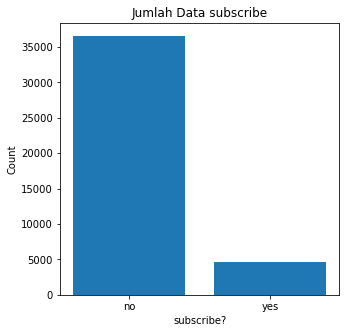

In [9]:
subscribe = df['y'].value_counts().to_dict()

plt.figure(figsize=(5,5))
plt.bar(['no','yes'], subscribe.values())
plt.xlabel('subscribe?')
plt.ylabel('Count')
plt.title('Jumlah Data subscribe')

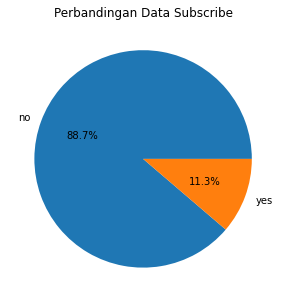

In [10]:
plt.figure(figsize=(5,5),facecolor='white')
fig = plt.pie(subscribe.values(), labels=['no','yes'], autopct='%1.1f%%')
plt.title('Perbandingan Data Subscribe')
plt.show()

> sample data yang kita miliki sangat jauh perbedaanya data yang tidak subscirbe jauh lebih banyak dari pada yang subscribe.

In [11]:
df.groupby(['marital','y'])[['y']].count().unstack()

y      
y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12

> Pelanggan yang paling banyak subscribe adalah dengan status `married`

In [12]:
df.groupby(['job','y'])[['y']].count().unstack()

y      
y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37

> Pelanggan yang paling sering di hubungi adalah admin dengan total 10422 kali menghubungi namun dengan tingkat keberhasilan hanya 12.97%

In [13]:
df.groupby(['education','y'])[['y']].count().unstack()

y      
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251

> Pelanggan yang paling sering di hubungi adalah yang berpendidikan universitas dengan total 12168 dengan tinggat keberhasilan subsribe sebesar 13.72%

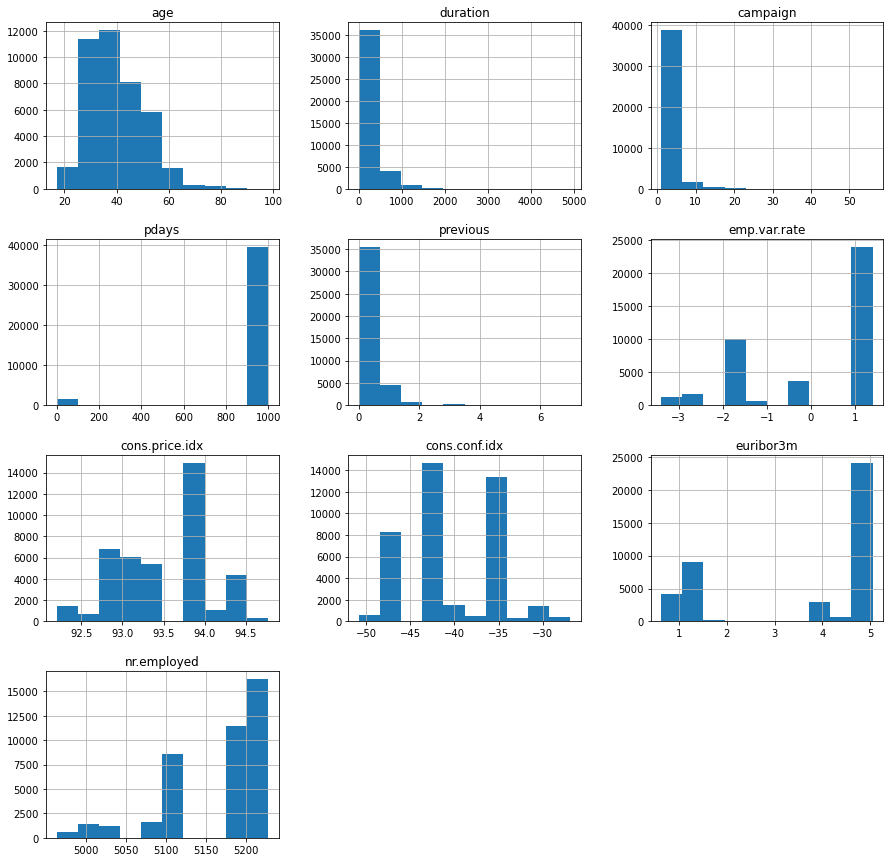

In [14]:
# Histogram plot

df.hist()
plt.gcf().set_size_inches(15, 15)
plt.show()

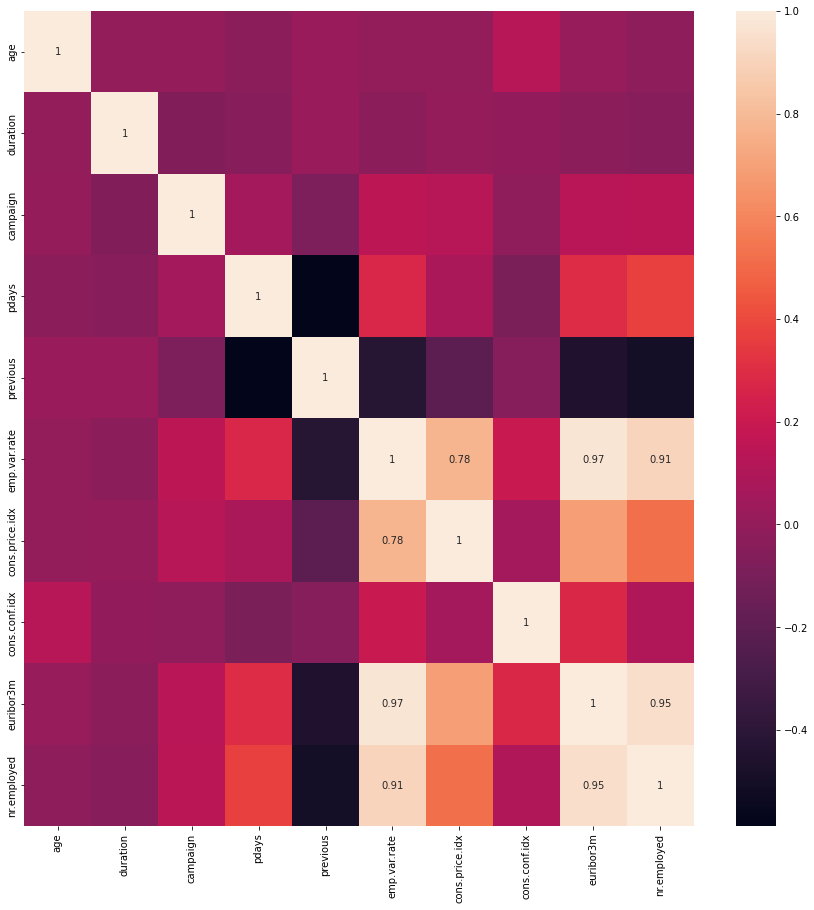

In [15]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

> Feature yang saling berkaitan disini adalah:
- emp.var.rate
- re.employed
- euribor3m
- cons.price.idx

dengan asumsi korelasi di ambang 70%

# 6. Data Preprocessing
   > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


In [16]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

value 999 bermakna orang yang belum pernah di hubungi sebelumnya

In [17]:
df[df.pdays == 999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [18]:
df[df.pdays != 999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,119,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,112,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,94,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,77,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,200,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,385,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


Pada dataset ini kita memiliki 
- 39673 data 999 yang berarti belum pernah di hubungi
- 1515 data yang berarti pernah di hubungi
> hal ini akan di rubah karena urutan menghubungi tidak sesuai dengan urutan yang ada di dataset
dimana 999 berarti tidak pernah di hubungi maka dataset akan di rubahdari 999 menjadi 0, 0 menjadi 1 dst.

In [19]:
df['pdays'] = (df['pdays']+1).replace(1000,0)

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df['pdays'].unique()

array([ 0,  7,  5,  4,  6,  2,  1, 11,  8,  9, 10, 12,  3, 13, 14, 15, 16,
       17, 22, 18, 19, 23, 26, 27, 20, 28, 21], dtype=int64)

> Value di dalam `pdays` sudah di *geser* karena urutan menghubungi tidak sesuai dengan urutan yang ada di dataset. 999 mejadi 0, 0 menjadi 1 dst.hal ini dilakukan agar scaling yang di lakukan kedepanya bisa di optimalkan

In [22]:
# Merubah value dari columns target  ke 0,1 agar bisa di baca komputer
df['y'] =df['y'].map({'yes': 1, 'no': 0})

print(df.y)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [23]:
df['y'].unique()

array([0, 1], dtype=int64)

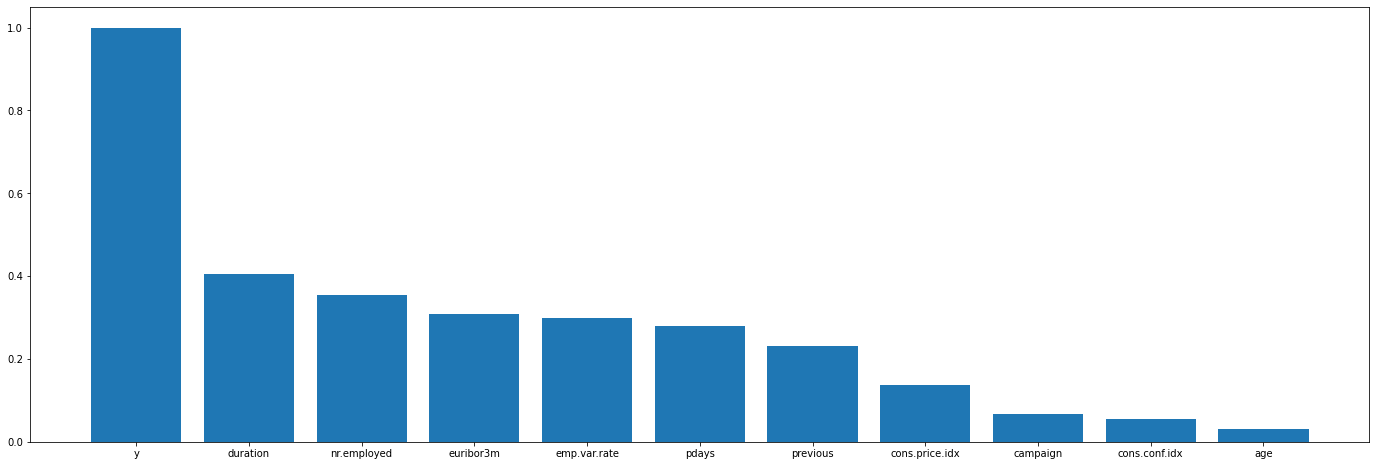

In [24]:
_corr = df.corrwith(df['y']).abs().sort_values(ascending=False)
plt.figure(figsize=(8 * 3, 8))
plt.bar(_corr.index, _corr.values);

> Corelation yang ter besar terhadap target kita adalah 

    - duration
    - nr.employed
    - euribor3m
    - emp.var.rate
    - pdays
    - previous

In [25]:
# memisahkan data numerik dan categorical

num_cols = [col for col in df.columns if df[col].dtypes != 'O']
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


## 6.1 Cardinality reduction
 > bagian ini berisi proses rekayasa cardinalitas data.

In [26]:
# melihat cardinality dari feature categori, semakin tinggi cardinality menjadikan model kita semakin tidak baik

for var in cat_cols:
    
    print(var, ' berisi ', len(df[var].unique()), ' labels')

job  berisi  12  labels
marital  berisi  4  labels
education  berisi  8  labels
default  berisi  3  labels
housing  berisi  3  labels
loan  berisi  3  labels
contact  berisi  2  labels
month  berisi  10  labels
day_of_week  berisi  5  labels
poutcome  berisi  3  labels


> Cardinality feature masih tergolong sedikit jadi tidak akan di kurangi

## 6.2 Data Splitting
 > bagian ini berisi proses pembagian data menjadi train-test-inference.

## Memecah dataset

In [27]:
#mengambil data inference 
df_inf = df.sample(5, random_state=random_state) #diambil sebanyak 5 sample
df_train_test = df.drop(df_inf.index)
#reset index dari data yang di ambil
df_train_test = df_train_test.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)
#menghapus target dari data 
X = df_train_test.drop('y', axis=1)
y = df_train_test[['y']]
#memecah data menjadi train dan test, dan data validation untuk keperluas corss validation nantinya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state, stratify=y_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((26356, 20), (26356, 1), (8237, 20), (8237, 1))

## 6.3 Handling Outlier
 > bagian ini berisi proses penanganan outliers.

In [28]:
# # memisahkan data numerik dan categorical harus di update karena target sudah di keluarkan

# num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
# cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

# print('Numerical Columns:', num_cols)
# print('Categorical Columns:', cat_cols)


In [29]:
# #pisahkan data menjadi feature categori dan numerik
# X_train_cat = X_train[cat_cols]
# X_train_num = X_train.drop(columns=cat_cols)

# X_test_cat = X_test[cat_cols]
# X_test_num = X_test.drop(columns=cat_cols)

In [30]:
# #deteksi outlier untuk distribusi normal
# def find_normal_boundaries(dataframe, variable):
#     upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
#     lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
#     return upper_boundary, lower_boundary

# #deteksi outlier untuk distribusi skewed
# def find_skewed_boundaries(dataframe, variable):
#     Q1 = dataframe[variable].quantile(0.25)
#     Q3 = dataframe[variable].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_boundary = Q3 + 1.5 * IQR
#     lower_boundary = Q1 - 1.5 * IQR
#     return upper_boundary, lower_boundary

# #deteksi outlier untuk distribusi skewed extreme
# def find_extreme_skewed_boundaries(dataframe, variable):
#     Q1 = dataframe[variable].quantile(0.25)
#     Q3 = dataframe[variable].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_boundary = Q3 + 3 * IQR
#     lower_boundary = Q1 - 3 * IQR
#     return upper_boundary, lower_boundary

In [31]:
# #variable untuk summary
# distribution = []
# skewness = []
# upper_limit = []
# lower_limit = []
# outliers_percent = []
# max = []
# min = []

# #loop untuk summary outlier
# for column in X_train_num.columns:
#     col_skewness = X_train_num[column].skew()

#     if (col_skewness >= -0.5) & (col_skewness <= 0.5):
#         col_distribution = 'Normal'
#         col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      

#     else:
#         col_distribution = 'Skewed'
#         col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
#     col_max = X_train_num[column].max()
#     col_min = X_train_num[column].min()
#     col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
#     distribution.append(col_distribution)
#     skewness.append(col_skewness)
#     upper_limit.append(col_upper_limit)
#     max.append(col_max)
#     min.append(col_min)
#     lower_limit.append(col_lower_limit)
#     outliers_percent.append(col_outliers_percent)

# #df summary
# outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'upper_limit':upper_limit, 'lower_limit':lower_limit, 'max':max, 'min':min , 'outliers_percent':outliers_percent}
# outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
# outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
# outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
# outliers_summary

>Asumsi saya untuk outlier
- "<5%: trim \remove"
- "5-15% : capping"
- ">15% di biarkan"


In [32]:
# #grouping outliers kelompokan outlier berdasarkan persentasinya
# outliers_retain = list(outliers_summary[(outliers_summary['outliers_percent']>15)].index)
# outliers_capping = list(outliers_summary[(outliers_summary['outliers_percent']>=5) & (outliers_summary['outliers_percent']<=15)].index)
# outliers_trimming = list(outliers_summary[(outliers_summary['outliers_percent']<5)].index)

In [33]:
# #cek feature dengan outlier yang akan di-trimming
# outliers_summary.loc[outliers_trimming]

In [34]:
# #menentukan index untuk trim
# trim_index = []
# for col in outliers_trimming:
#     upper = outliers_summary.loc[col]['upper_limit']
#     lower = outliers_summary.loc[col]['lower_limit']
#     trim_index.append(X_train_num[((X_train_num[col]>upper) | (X_train_num[col]<lower)) & (X_train_num[col].isnull()==False)].index)

# trim_index = [item for sublist in trim_index for item in sublist]
# trim_index = list(set(trim_index))
# len(trim_index)

In [35]:
# #memastikan shape sebelum trim
# X_train_num.shape, X_train_cat.shape, y_train.shape

In [36]:
# X_train_cat[ X_train_cat.index.isin(trim_index)]

> setelah di lihat kembali data categorical yang akan di trim ini mempunyai nilai sample `poutcome ['success']` dari semua sample yang ada sehingga saya memutuskan untuk tidak melakukan trimming, jika di lakukan triming yang terjadi adalah train test tidak akan mengenali `poutcome ['success']` sejauh percobaan yang sudah saya lakukan sebelumnya

In [37]:
# #trim data
# X_train_num = X_train_num[~ X_train_num.index.isin(trim_index)]
# X_train_cat = X_train_cat[~ X_train_cat.index.isin(trim_index)]
# y_train = y_train[~ y_train.index.isin(trim_index)]

# X_train_num.shape, X_train_cat.shape, y_train.shape

## 6.4 Handling Missing Values

### *Data tidak memiliki missing values*

In [38]:
# #Cek jumlah missing value pada tiap feature.
# X_train_cat.isnull().sum()

In [39]:
# #Visualisasikan Missing value
# msno.matrix(X_train)

### Target
>missing value di target akan di cek juga agar model tidak bias

In [40]:
# #Cek jumlah missing value.
# y_train.isnull().sum(), y_test.isnull().sum()


In [41]:
# #Visualisasikan Missing value
# msno.matrix(y_train)

> dataset kita bersih dari missing value

## 6.5 Feature Selection
> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

In [42]:
# plt.figure(figsize=(15,15))
# ax = sns.heatmap(X_train_num.corr(),annot=True)

# for t in ax.texts:
#     if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
#         t.set_text(t.get_text())
#     else:
#         t.set_text('')

# plt.show()

In [43]:
# _corr = X_test_num.corrwith(y['y']).abs().sort_values(ascending=False)
# plt.figure(figsize=(8 * 3, 8))
# plt.bar(_corr.index, _corr.values);

In [44]:
# #update numcols dan catcols
# num_cols = X_train_num.columns.tolist()
# cat_cols = X_train_cat.columns.tolist()

In [45]:
# cat_cols

In [46]:
# X_test_cat


## 6.6 Feature Scalling
Lakukan feature scaling dengan standard scaler untuk feature numerik karena model yang digunakan sensitif terhadap variance.


> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

In [47]:
# scaler = StandardScaler()
# scaler.fit(X_train_num)

# X_train_num_scaled = scaler.transform(X_train_num)
# X_test_num_scaled = scaler.transform(X_test_num)

## 6.7 Feature Encoding
Lakukan feature encoding dengan onehot encoder karena dari feature kategorik tidak ada tingkatan yang bermakna atau tidak bisa dibandingkan.


> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

In [48]:
# X_test_cat.shape

In [49]:
# X_train_cat.shape

In [50]:

# encoder = OneHotEncoder()
# encoder.fit(X_train_cat)

# X_train_cat_enc = encoder.transform(X_train_cat).toarray()
# X_test_cat_enc = encoder.transform(X_test_cat).toarray()

In [51]:
# #Simpan label baru untuk feature kategorik.
# enc_feature = []
# for i in range(len(cat_cols)):
#     enc_feature+=(encoder.categories_[i].tolist())

## 6.8 Final Features


> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

In [52]:
# #Gabungkan feature numerik dan kategorik yang telah di-scale dan encode.
# X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_enc], axis=1)
# X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_enc], axis=1)

# X_train_final = pd.DataFrame(X_train_final, columns=[num_cols + enc_feature])
# X_test_final = pd.DataFrame(X_test_final, columns=[num_cols + enc_feature])

In [53]:
# #lima dataset teratas
# X_train_final.head()


In [54]:
# #melihat shape feature
# X_train_final.shape


## 6.9 Preprosesing menggunakan Pipeline

In [55]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [56]:
# melakukan encoding terhadap features sesuai dengan tipe nya
preprocessing_pipeline = ColumnTransformer([
    ('std', StandardScaler(), ["age","campaign","nr.employed","euribor3m","duration","cons.conf.idx","cons.price.idx","emp.var.rate","previous","pdays"]),
    ('cat', OrdinalEncoder(), ["marital","education","month","day_of_week","poutcome"]),
    ('ohe', OneHotEncoder(), ["job","default","housing","loan","contact"])

])

In [57]:
preprocessing_pipeline.fit(X_train)

ColumnTransformer(transformers=[('std', StandardScaler(),
                                 ['age', 'campaign', 'nr.employed', 'euribor3m',
                                  'duration', 'cons.conf.idx', 'cons.price.idx',
                                  'emp.var.rate', 'previous', 'pdays']),
                                ('cat', OrdinalEncoder(),
                                 ['marital', 'education', 'month',
                                  'day_of_week', 'poutcome']),
                                ('ohe', OneHotEncoder(),
                                 ['job', 'default', 'housing', 'loan',
                                  'contact'])])

> Features sudah selesai di encoding sesuai dengan categorinya

# 7. Model Definition
   > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

- SVM	Mengimplementasikan SVM dan menentukan hyperparameter yang tepat dengan Scikit-Learn	20 pts
- Decision Tree	Mengimplementasikan Decision Tree dan menentukan hyperparameter yang tepat dengan Scikit-Learn	20 pts
- Random Forest	Mengimplementasikan Random Forest dan menentukan hyperparameter yang tepat dengan Scikit-Learn	20 pts
- KNN	Mengimplementasikan KNN dan menentukan hyperparameter yang tepat dengan Scikit-Learn	20 pts
- Naive Bayes	Mengimplementasikan Naive Bayes dan menentukan hyperparameter yang tepat dengan Scikit-Learn	20 pts
- Other Algorithm [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)	Mengimplementasikan algoritma lain selain yang tersebut diatas dan menentukan hyperparameter yang tepat dengan Scikit-Learn	40 pts


In [58]:
# deklarasi model jika tidak menggunakan pipeline
m_lr = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=2)
m_dt = DecisionTreeClassifier(max_depth=5) 
m_svc = LinearSVC(C=0.01, max_iter=1000, verbose=2)
m_knn = KNeighborsClassifier(n_neighbors=5) 
m_be = BernoulliNB()
m_rf = RandomForestClassifier(n_estimators=100, verbose=2) 
# m_ny = Nystroem(kernel='rbf', gamma=0.1, n_components=100,)
m_mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, verbose=2)

In [59]:
#pipeline logistic regresion
lr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', LogisticRegression(C=100, penalty='l2', solver='sag', max_iter=1000))
])

#pipeline decision tree
dt_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', DecisionTreeClassifier(max_depth=5, random_state=random_state, min_samples_leaf=5, min_samples_split=5))
])

#pipeline Linear SVC
svc_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=1000))
])

#pipeline knn
knn_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', KNeighborsClassifier(n_neighbors=5, weights='uniform',  p=2, metric='minkowski', n_jobs=1))
])

#pipeline Bernoulli Native Bayes
be_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))
])

#pipeling random forest
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestClassifier(n_estimators=100, random_state=random_state, min_samples_leaf=5, min_samples_split=5))
])

#pipeline MLP Classifier
mlp_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, solver='adam', activation='relu'))
])

# 8. Model Training
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.


In [62]:
#Training model

mlp_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
be_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['age', 'campaign',
                                                   'nr.employed', 'euribor3m',
                                                   'duration', 'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'previous',
                                                   'pdays']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['marital', 'education',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['job', 'default', 'housing',
        

# 9. Model Evaluation
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.


## 9.1. Classification Report

In [63]:
print('SVM - Linear SVC')
print(classification_report(y_test, svc_pipeline.predict(X_test)))

SVM - Linear SVC
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.65      0.33      0.44       928

    accuracy                           0.90      8237
   macro avg       0.79      0.65      0.69      8237
weighted avg       0.89      0.90      0.89      8237



In [64]:
print('Decission Tree')
print(classification_report(y_test, dt_pipeline.predict(X_test)))

Decission Tree
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7309
           1       0.63      0.48      0.54       928

    accuracy                           0.91      8237
   macro avg       0.78      0.72      0.75      8237
weighted avg       0.90      0.91      0.90      8237



In [65]:
print('K-Nearest Neighbour')
print(classification_report(y_test, knn_pipeline.predict(X_test)))

K-Nearest Neighbour
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7309
           1       0.57      0.40      0.47       928

    accuracy                           0.90      8237
   macro avg       0.75      0.68      0.71      8237
weighted avg       0.89      0.90      0.89      8237



In [66]:
print('Logistic regresion')
print(classification_report(y_test, lr_pipeline.predict(X_test)))

Logistic regresion
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7309
           1       0.64      0.38      0.48       928

    accuracy                           0.91      8237
   macro avg       0.78      0.68      0.71      8237
weighted avg       0.89      0.91      0.90      8237



In [67]:
print('Bernnouli Native Bayes')
print(classification_report(y_test, be_pipeline.predict(X_test)))

Bernnouli Native Bayes
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      7309
           1       0.32      0.65      0.43       928

    accuracy                           0.81      8237
   macro avg       0.63      0.74      0.66      8237
weighted avg       0.88      0.81      0.83      8237



In [68]:
print('Random Forest')
print(classification_report(y_test, rf_pipeline.predict(X_test)))

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7309
           1       0.66      0.47      0.55       928

    accuracy                           0.91      8237
   macro avg       0.80      0.72      0.75      8237
weighted avg       0.90      0.91      0.91      8237



In [69]:
print('MLP Classifier')
print(classification_report(y_test, mlp_pipeline.predict(X_test)))

MLP Classifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7309
           1       0.60      0.43      0.50       928

    accuracy                           0.90      8237
   macro avg       0.77      0.70      0.73      8237
weighted avg       0.89      0.90      0.90      8237



> setelah di evaluasi kembali model yang memiliki  terbaik terbaik adalah 

>- RandomForest 
>    - accuracy 91%
>    - 0 f1 score 95%
>    - 1 F1 score 55%


>- logistic regression
>    - accuracy 91%
>    - 0 f1 score 95%
>    - 1 F1 score 48%


>- DecisionTree
>    - accuracy 91%
>    - 0 f1 score 95%
>    - 1 F1 score 54%

> setelah ini saya akan melakukan cross validation ke setiap model 

In [70]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model SVM Linear SVC
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result1 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    svc_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, svc_pipeline.predict(X_test_fold)))
    result1.append(mean_absolute_error(y_test_fold, svc_pipeline.predict(X_test_fold)))
print('Cross Validation Result : SVM Linear SVC')
print('Rata-rata',np.mean(result1))
print('Standart Deviasi',np.std(result1))

0.09256449165402124
0.09239233542022386
0.08689053310567255
0.09675583380762663
0.09011572756592677
Cross Validation Result : SVM Linear SVC
Rata-rata 0.09174378431069422
Standart Deviasi 0.003237883113022784


In [71]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model Decision Tree
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result2 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    dt_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, dt_pipeline.predict(X_test_fold)))
    result2.append(mean_absolute_error(y_test_fold, dt_pipeline.predict(X_test_fold)))
print('Cross Validation Result : Decision tree')
print('Rata - rata',np.mean(result2))
print('Standard Deviasi', np.std(result2))

0.08858118361153262
0.0834756213242269
0.08518307721494972
0.08689053310567255
0.09049516220830962
Cross Validation Result : Decision tree
Rata - rata 0.08692511549293827
Standard Deviasi 0.002466685974615274


In [72]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model K-Nearest Neighbour
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result3 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, knn_pipeline.predict(X_test_fold)))
    result3.append(mean_absolute_error(y_test_fold, knn_pipeline.predict(X_test_fold)))
print('Cross Validation result : K-Nearest Neighbour')
print('Rata-rata',np.mean(result3))
print('Standard Deviasi', np.std(result3))

0.09939301972685888
0.09675583380762663
0.09941187630430659
0.10036046291026371
0.0965661164864352
Cross Validation result : K-Nearest Neighbour
Rata-rata 0.0984974618470982
Standard Deviasi 0.001540929187661589


In [73]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model Logistic Regression
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result4 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    lr_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, lr_pipeline.predict(X_test_fold)))
    result4.append(mean_absolute_error(y_test_fold, lr_pipeline.predict(X_test_fold)))
print('Cross Validation result : Logistic Regression')
print('Rata-rata', np.mean(result4))
print('Standard Deviasi', np.std(result4))

0.09066767830045523
0.08992601024473534
0.08594194649971543
0.09561752988047809
0.08935685828116106
Cross Validation result : Logistic Regression
Rata-rata 0.09030200464130902
Standard Deviasi 0.0031123401555636252


In [74]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model Bernoulli Naive Bayes
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result5 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    be_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, be_pipeline.predict(X_test_fold)))
    result5.append(mean_absolute_error(y_test_fold, be_pipeline.predict(X_test_fold)))
print('Cross Validation result : Bernnouli Native Bayes')
print('Rata - rata', np.mean(result5))
print('Standard Deviasi', np.std(result5))

0.20637329286798178
0.20015177385695315
0.19502940618478468
0.20072092582052742
0.20166951242648454
Cross Validation result : Bernnouli Native Bayes
Rata - rata 0.2007889822313463
Standard Deviasi 0.0036205867241254457


In [75]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model Random Forest
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result6 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    rf_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, rf_pipeline.predict(X_test_fold)))
    result6.append(mean_absolute_error(y_test_fold, rf_pipeline.predict(X_test_fold)))
print('Cross Validation result : Random Forest')
print('Rata - rata', np.mean(result6))
print('Standard Deviasi',np.std(result6))

0.08497723823975721
0.08138873079112123
0.08670081578448112
0.08916714095996965
0.08309618668184406
Cross Validation result : Random Forest
Rata - rata 0.08506602249143465
Standard Deviasi 0.0027167013753165406


In [76]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model MLP Classifier
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result7 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    mlp_pipeline.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, mlp_pipeline.predict(X_test_fold)))
    result7.append(mean_absolute_error(y_test_fold, mlp_pipeline.predict(X_test_fold)))
print('Cross Validation result : MLP Classifier')
print('Rata - Rata', np.mean(result7))
print('Standard Deviasi', np.std(result7))

0.09635811836115327
0.09903244166192374
0.09789413773477519
0.0980838550559666
0.09979131094668943
Cross Validation result : MLP Classifier
Rata - Rata 0.09823197275210165
Standard Deviasi 0.0011592832018112655


In [90]:
print('Cross Validation Result : SVM Linear SVC')
print('Rata- Rata MAE',np.mean(result1))
print('Standart Deviasi',np.std(result1))
print()

print('Cross Validation Result : Decision tree')
print('Rata - Rata MAE',np.mean(result2))
print('Standard Deviasi', np.std(result2))
print()

print('Cross Validation result : K-Nearest Neighbour')
print('Rata - Rata MAE',np.mean(result3))
print('Standard Deviasi', np.std(result3))
print()

print('Cross Validation result : Logistic Regression')
print('Rata - Rata MAE', np.mean(result4))
print('Standard Deviasi', np.std(result4))
print()

print('Cross Validation result : Bernnouli Native Bayes')
print('Rata - Rata MAE', np.mean(result5))
print('Standard Deviasi', np.std(result5))
print()

print('Cross Validation result : Random Forest')
print('Rata - Rata MAE', np.mean(result6))
print('Standard Deviasi',np.std(result6))
print()

print('Cross Validation result : MLP Classifier')
print('Rata - Rata MAE', np.mean(result7))
print('Standard Deviasi', np.std(result7))


Cross Validation Result : SVM Linear SVC
Rata- Rata MAE 0.09174378431069422
Standart Deviasi 0.003237883113022784

Cross Validation Result : Decision tree
Rata - Rata MAE 0.08692511549293827
Standard Deviasi 0.002466685974615274

Cross Validation result : K-Nearest Neighbour
Rata - Rata MAE 0.0984974618470982
Standard Deviasi 0.001540929187661589

Cross Validation result : Logistic Regression
Rata - Rata MAE 0.09030200464130902
Standard Deviasi 0.0031123401555636252

Cross Validation result : Bernnouli Native Bayes
Rata - Rata MAE 0.2007889822313463
Standard Deviasi 0.0036205867241254457

Cross Validation result : Random Forest
Rata - Rata MAE 0.08506602249143465
Standard Deviasi 0.0027167013753165406

Cross Validation result : MLP Classifier
Rata - Rata MAE 0.09823197275210165
Standard Deviasi 0.0011592832018112655


> Dari hasil Cross Validation ini saya akan menentukan model yang memiliki performa terbaik adalah RandomForest dengan 
- Rata - Rata MAE 0.08506602249143465
- Standard Deviasi 0.0027167013753165406

## 9.2 Model Evaluation Tunning
   > Bagian ini berisi proses pengaturan hyperparameter model.

- Cross Validation	Mengimplementasikan Cross Validation dengan Scikit-Learn	40 pts
- Grid Search	Mengimplementasikan Grid Search dengan Scikit-Learn	40 pts

In [91]:
#Melakukan GridSearch kepada model randomforest

rf_gs = GridSearchCV(estimator=rf_pipeline, 
param_grid={"model__n_estimators": [10, 100,500],
            "model__max_depth" : [5, 10, 15],
            "model__min_samples_leaf" : [1, 2, 3],
            "model__min_samples_split" : [2, 3, 4]
            },cv=5, n_jobs=-1)

rf_gs.fit(X_train, y_train)
print(rf_gs.best_score_)

0.9162240912785018


- waktu yang di perlukan untuk gridsearch adalah 16m 34s
- best score 0.9162240912785018

In [92]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model yang terpilih
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    rf_gs.best_estimator_.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, rf_gs.best_estimator_.predict(X_test_fold)))
    result.append(mean_absolute_error(y_test_fold, rf_gs.best_estimator_.predict(X_test_fold)))

0.083649468892261
0.08480364257256688
0.08632138114209828
0.08594194649971543
0.0827167520394612


In [93]:
print('Cross Validation result : Random Forest Tune up Hyperparameter')
print('Rata - Rata MAE', np.mean(result6))
print('Standard Deviasi',np.std(result6))
print()

Cross Validation result : Random Forest Tune up Hyperparameter
Rata - Rata MAE 0.08506602249143465
Standard Deviasi 0.0027167013753165406



In [94]:
rf_gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['age', 'campaign',
                                                   'nr.employed', 'euribor3m',
                                                   'duration', 'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'emp.var.rate', 'previous',
                                                   'pdays']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['marital', 'education',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['job', 'default', 'housing',
        

In [95]:
print('Random Forest - Best estimator')
print(classification_report(y_test, rf_gs.best_estimator_.predict(X_test)))

Random Forest - Best estimator
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7309
           1       0.67      0.46      0.54       928

    accuracy                           0.91      8237
   macro avg       0.80      0.71      0.75      8237
weighted avg       0.90      0.91      0.91      8237



Rata-rata hasil evaluasi model dari 5 fold cross validation Random Forest dengan Hyper Parameter terbaik  MAE adalah 0.085066 dan standard deviasi 0.0027167

# 10. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.
   

In [96]:
df_inf_x = df_inf.drop('y', axis=1)

In [97]:
df_inf_x ["prediction"] = rf_gs.best_estimator_.predict(df_inf_x)
df_inf_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prediction
0,48,entrepreneur,single,university.degree,no,no,no,cellular,jul,tue,149,2,0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
1,42,blue-collar,married,basic.6y,no,no,no,telephone,jun,mon,298,4,0,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,35,self-employed,single,basic.6y,unknown,no,yes,telephone,may,wed,138,2,0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
3,35,services,divorced,high.school,no,yes,yes,cellular,apr,fri,107,1,0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,44,blue-collar,married,basic.9y,no,no,no,cellular,aug,mon,135,3,0,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,0


# 11. Pengambilan Kesimpulan
   > Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

> ### Dari berbagai percobaan model yang saya lakukan, yang paling bagus adalah 

- RandomForest 
    - accuracy 91%
    - 0 f1 score 95%
    - 1 F1 score 55%

> ### Setelah di lakukan gridsearch dengan parameter yang tepat di dapatkan hasil hyper parameter sebagai berikut

    - max_depth=15
    - min_samples_leaf=2
    - n_estimators=500
    - random_state=14

>### Dengan nilai MAE 0.085066, standard deviasi 0.0027167 dan best score 0.91622409

> ### Model kita mempunyai akurasi yang cukup tinggi untuk memprediksi target yaitu pelanggan yang `tidak `akan men `subscribe` deposit